# **Decoding Real Estate Trends: Exploring Regression Models for House Price Prediction**

## **Introduction**

House prices are influenced by a wide array of factors, from physical attributes like square footage to seemingly obscure details like proximity to railroads. Understanding the nuances behind these price variations is crucial for developing effective predictive models. This project explores the Kaggle competition dataset, "House Prices – Advanced Regression Techniques," to tackle the challenge of predicting sales prices using various regression methods.

The aim of this project is to provide hands-on experience in regression analysis, with a particular focus on linear regression, Random Tree Regression, and XGBoost Regression. By analyzing the Ames Housing dataset, which contains 79 explanatory variables describing residential homes, the intricate relationships between these features and house prices are explored. Through creative feature engineering and experimentation with different regression techniques, models are developed to deliver accurate predictions while minimizing errors.

Beyond technical skill development, this project offers an opportunity to gain a deeper understanding of the pre-processing steps required for regression problems. Various transformations are applied, features are selected or engineered, and models are refined to improve prediction performance. This process highlights the real-world applications of regression in domains such as economics and real estate.

## **What Is Regression & How Does It Work?**

Regression is a statistical and machine learning technique used to predict a continuous target variable based on one or more predictor variables. In this project, we use three regression models: Linear Regression, Random Forest, and XGBoost, each with unique strengths.

Linear Regression models the target variable as a linear combination of predictors, minimizing the sum of squared residuals to find the best-fit line. It's simple, interpretable, and efficient but struggles with non-linear relationships. Random Forest, an ensemble method, combines multiple decision trees to handle non-linear interactions and reduce overfitting through bagging (averaging predictions from all trees). It’s robust and works well on complex datasets. XGBoost, a gradient boosting model, improves predictions iteratively by focusing on residual errors, with built-in regularization and optimized performance for large datasets. Together, these models balance simplicity, accuracy, and scalability, allowing us to analyze house prices effectively.

## **Data Understanding**

The dataset used in this project is the "House Prices - Advanced Regression Techniques" dataset, sourced from Kaggle. It provides extensive information about residential homes in Ames, Iowa, consisting of 79 explanatory variables that describe various factors influencing house prices. To gain an initial understanding of the data, the following steps were taken:

### Key Columns
Below are some of the key columns examined to understand the data's structure:
- **Id:** Unique identifier for each house
- **MSSubClass:** The type of dwelling involved in the sale
- **MSZoning:** The general zoning classification
- **LotArea:** Lot size in square feet
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **Exterior1st:** Exterior covering on the house
- **Exterior2nd:** Exterior covering (if more than one material)
- **SalePrice:** The property's sale price (target variable)

### Initial Exploration and Insights
To better understand the dataset:
- **Feature Correlations:** Examined relationships between `SalePrice` and other features using correlation matrices to identify which variables most strongly influence house prices.
- **Patterns Identification:** Analyzed trends and distributions in key features like `OverallQual`, `LotArea`, and `YearBuilt` using summary statistics and histograms.
- **Visualization Techniques:** Scatter plots, box plots, and heatmaps were used to explore interactions between numerical and categorical variables.

As part of this project's objective, scatter plots will also be used to compare the performance of the three regression models (Linear Regression, Random Forest, and XGBoost). These visualizations will help illustrate the relationship between actual and predicted house prices for each model, highlighting differences in accuracy and predictive power.

This data is publicly available at: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# Load training data
train_df = pd.read_csv("train.csv")

# Load test data
test_df = pd.read_csv("test.csv")

# Display first few rows
train_df.head()

print(train_df.isnull().sum().sort_values(ascending=False).head(20))  # Top missing values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


## **Data Pre-Processing**

In [2]:
# Separate features and target variable for training
X_train = train_df.drop(columns=['Id', 'SalePrice'], errors='ignore')
y_train = train_df['SalePrice']

# Prepare test data (ensure 'SalePrice' is dropped from the test set)
X_test = test_df.drop(columns=['Id'], errors='ignore')

# Perform one-hot encoding on both training and test sets
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Align test set with train set (ensure they have the same columns)
X_train, X_test = X_train.align(X_test, join='left', axis=1)

# Handle missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Create preprocessed data for Linear Regression (scaled and polynomial features)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_imputed)
X_test_poly = poly.transform(X_test_imputed)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Create preprocessed data for Random Forest and XGBoost (raw imputed data)
X_train_rf = X_train_imputed
X_test_rf = X_test_imputed

# Split training data into training and validation sets
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)  # For Linear Regression
X_train_rf_sub, X_valid_rf, y_train_rf_sub, y_valid_rf = train_test_split(X_train_rf, y_train, test_size=0.2, random_state=42)  # For Random Forest and XGBoost

Prior to data analysis, several preprocessing steps were undertaken to prepare the data for effective modeling:

- **Handling Missing Values:** Missing values in the training and test datasets were imputed using KNNImputer, which calculates the average of the five nearest neighbors for each missing value. This approach ensures a more informed imputation compared to simpler methods like mean replacement.

- **Encoding Categorical Variables:** Categorical features were transformed into numerical representations using one-hot encoding. This process created binary columns for each category, enabling compatibility with machine learning algorithms. To ensure consistency, the training and test datasets were aligned so they contained the same set of features.

- **Creating Polynomial Features:** Polynomial transformations were applied to the data to capture interaction terms and nonlinear relationships between features. A second-degree polynomial expansion was implemented, creating additional features that could enhance the predictive power of regression models.

- **Standardizing Numerical Features:** Numerical features were standardized using StandardScaler. This ensured all variables had a mean of 0 and a standard deviation of 1, eliminating discrepancies in scale and promoting better model performance.

- **Splitting Data into Training and Validation Sets:** The training dataset was further divided into training and validation subsets using an 80-20 split. This allowed for evaluation of model performance on unseen data before moving forward with predictions.

These preprocessing steps optimized the dataset for regression modeling, addressing missing values, ensuring feature consistency, and enhancing the quality of the input data.

## **Linear Regression Model**

Validation RMSE: 30091.136497890326
Cross-validation RMSE: 42842.77340841023
Submission file saved!


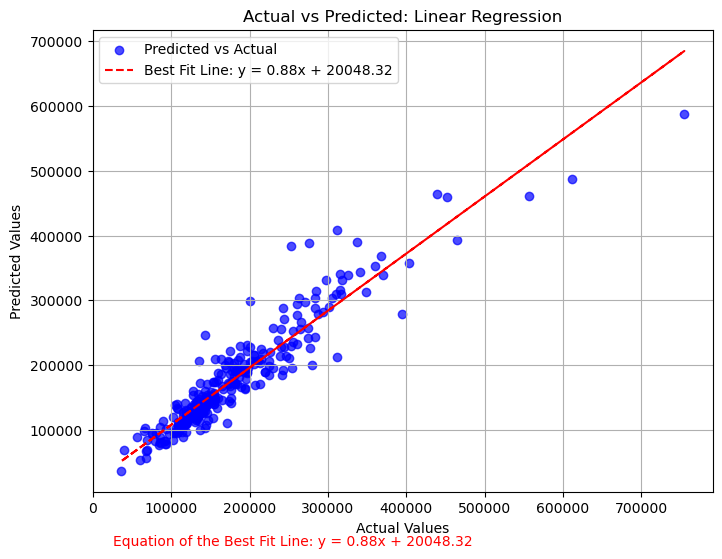

In [3]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train_sub, y_train_sub)  # Use preprocessed data for Linear Regression

# Validate the model
y_pred = model.predict(X_valid)  # Validate using the corresponding validation set
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE:", rmse)

# Perform cross-validation to get a more reliable estimate of model performance
cv_scores = cross_val_score(
    model, 
    X_train_scaled, 
    y_train, 
    cv=5, 
    scoring='neg_mean_squared_error'  # Use RMSE instead of MAE for scoring
)
print("Cross-validation RMSE:", np.sqrt(-cv_scores.mean()))  # Convert negative MSE to positive RMSE

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)  # Use scaled test data for predictions

# Create a submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_test_pred})
submission.to_csv('submission.csv', index=False)

print("Submission file saved!")

# Calculate the line equation for Actual vs Predicted
actual = np.array(y_valid).reshape(-1, 1)  # Actual values reshaped
predicted = np.array(y_pred).reshape(-1, 1)  # Predicted values reshaped

# Fit linear regression model to compute the slope and intercept
line_model = LinearRegression()
line_model.fit(actual, predicted)
m = line_model.coef_[0][0]  # Slope
b = line_model.intercept_[0]  # Intercept

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_valid, y_pred, alpha=0.7, color='blue', label='Predicted vs Actual')
plt.plot(y_valid, m * y_valid + b, color='red', linestyle='--', label=f'Best Fit Line: y = {m:.2f}x + {b:.2f}')
plt.title('Actual vs Predicted: Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Display the equation below the graph
plt.figtext(0.15, 0.02, f"Equation of the Best Fit Line: y = {m:.2f}x + {b:.2f}", fontsize=10, color='red')

plt.show()

### Linear Regression Model: Explanation and Evaluation

The linear regression model serves as a foundational approach for predicting house prices in this project. It aims to model the relationship between the explanatory variables (features) and the target variable (`SalePrice`) by fitting a linear equation to the data.

#### Model Overview
Linear regression operates under the assumption that the target variable has a linear relationship with the predictors. The model minimizes the sum of squared residuals (the differences between observed and predicted values) to find the best-fit line. For this project, the following steps were implemented:

- Polynomial transformations were applied to capture nonlinear relationships and interaction terms.
- Features were standardized using `StandardScaler` to ensure consistency in scales, which helps improve model stability and performance.
- The model was trained on the processed data and validated on an 80-20 train-validation split.
- Cross-validation was employed to assess the robustness of the model across multiple folds.

The included graph depicts the relationship between the actual and predicted house prices. Each blue dot corresponds to a predicted value against its actual counterpart, and the red dashed line represents the best-fit line. The equation of the line is provided as:

$$ y = 0.88x + 20048.32 $$

This visualization illustrates how closely the model's predictions align with the observed data and provides a clear representation of the model's linear assumptions.

#### Evaluation
The model achieved the following results:
- **Validation RMSE**: **30,091.14**
- **Cross-validation RMSE**: **42,842.77**
- **Kaggle RMSE Score**: **0.16427**

These scores highlight the limitations of linear regression in capturing the complex, non-linear relationships present in the dataset. While the Kaggle RMSE score serves as a reasonable benchmark, the high validation and cross-validation RMSE values suggest significant room for improvement.

#### Performance Analysis
- **Strengths:**
  - The simplicity of linear regression makes it interpretable and computationally efficient.
  - By standardizing features and incorporating polynomial terms, the model can capture more complex relationships than a basic linear regression.

- **Limitations:**
  - Linear regression struggles with capturing highly nonlinear relationships inherent in the dataset.
  - The assumption of a linear relationship between features and the target variable does not hold true for all predictors.
  - Outliers in the data significantly influence the model, potentially skewing predictions.

#### Opportunities for Improvement
To enhance the model's performance:
- Experiment with advanced regression techniques such as Ridge, Lasso, or ElasticNet, which can regularize the model and prevent overfitting.
- Implement tree-based ensemble methods like Random Forest or Gradient Boosting, as these methods handle nonlinearity and interactions naturally.
- Perform feature selection to remove irrelevant or redundant features, improving the model's ability to generalize.
- Consider hyperparameter tuning for the polynomial degree and the regularization parameters in advanced models.

The linear regression model provides valuable insights and serves as a solid baseline for the project. However, exploring and experimenting with alternative models and techniques is essential to achieve better accuracy and lower error on the Kaggle leaderboard.

## **Random Forest Model**

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Validation RMSE: 29807.239273992775
Random Forest Cross-validation RMSE: 30621.009241867585
Random Forest submission file saved!


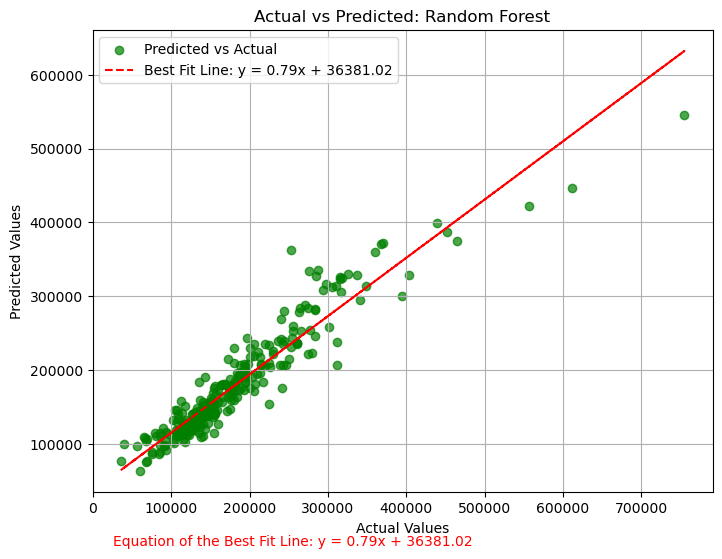

In [4]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Include multiple values to test the effect of additional trees
    'max_depth': [10, None],    # Test fixed depth and fully grown trees (None)
    'min_samples_split': [2, 5],  # Introduce a range to explore optimal splits
    'min_samples_leaf': [1, 2]    # Test variations in leaf size to prevent overfitting
}

grid_search = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid, 
    cv=3,  # Reduced folds for faster execution
    scoring='neg_mean_squared_error',  # Using MSE for RMSE calculation
    n_jobs=-1,  # Utilize all available cores for faster execution
    verbose=2  # Higher verbosity for detailed progress updates
)

# Fit the model using raw imputed data for Random Forest
grid_search.fit(X_train_rf_sub, y_train_rf_sub)  # Use the Random Forest-specific split (raw imputed data)

# Get the best estimator from GridSearchCV
best_rf_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)  # Print selected hyperparameters

# Validate the model using raw validation data
rf_pred = best_rf_model.predict(X_valid_rf)  # Use the corresponding validation set for Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_valid_rf, rf_pred))  # Calculate RMSE
print("Random Forest Validation RMSE:", rf_rmse)

# Perform cross-validation for a reliable estimate of model performance
rf_cv_scores = cross_val_score(
    best_rf_model, 
    X_train_rf,  # Use raw imputed training data
    y_train, 
    cv=3,  # Reduced folds for faster cross-validation
    scoring='neg_mean_squared_error'  # Using MSE for RMSE calculation
)
print("Random Forest Cross-validation RMSE:", np.sqrt(-rf_cv_scores.mean()))  # Convert negative MSE to RMSE

# Make predictions on the test set using raw test data
rf_test_pred = best_rf_model.predict(X_test_rf)  # Use raw imputed test data for predictions

# Create a submission file
rf_submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': rf_test_pred})
rf_submission.to_csv('rf_submission.csv', index=False)

print("Random Forest submission file saved!")

# Calculate the line equation for Actual vs Predicted
actual = np.array(y_valid_rf).reshape(-1, 1)  # Actual values reshaped
predicted = np.array(rf_pred).reshape(-1, 1)  # Predicted values reshaped

# Fit linear regression model to compute the slope and intercept
line_model = LinearRegression()
line_model.fit(actual, predicted)
m = line_model.coef_[0][0]  # Slope
b = line_model.intercept_[0]  # Intercept

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_valid_rf, rf_pred, alpha=0.7, color='green', label='Predicted vs Actual')
plt.plot(y_valid_rf, m * y_valid_rf + b, color='red', linestyle='--', label=f'Best Fit Line: y = {m:.2f}x + {b:.2f}')
plt.title('Actual vs Predicted: Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Display the equation below the graph
plt.figtext(0.15, 0.02, f"Equation of the Best Fit Line: y = {m:.2f}x + {b:.2f}", fontsize=10, color='red')

plt.show()

### Random Forest Model: Explanation and Evaluation

The Random Forest model leverages ensemble learning to predict house prices by combining multiple decision trees into a robust and accurate model. Each tree independently contributes to the overall prediction, making Random Forest particularly effective for handling complex datasets with non-linear relationships and interactions.

#### Model Overview
Random Forest operates by constructing a "forest" of decision trees, where each tree is trained on a different subset of the data. Predictions are made based on the average output of all the trees, minimizing overfitting through bagging (Bootstrap Aggregating). For this project, the following steps were implemented:

- Hyperparameter tuning through **GridSearchCV** to optimize:
  - `n_estimators` (number of trees)
  - `max_depth` (maximum depth of each tree)
  - `min_samples_split` (minimum number of samples required to split a node)
  - `min_samples_leaf` (minimum number of samples required to be a leaf)
- Training on raw imputed data without scaling or polynomial transformations.
- Validation of predictions through cross-validation and performance measurement using RMSE.

#### Evaluation
The Random Forest model achieved the following results:
- **Validation RMSE**: **29,807.24**
- **Cross-validation RMSE**: **30,621.01**
- **Kaggle RMSE Score**: **0.15126**

These results highlight Random Forest's ability to effectively capture non-linear relationships and interactions in the dataset, outperforming the Linear Regression model.

#### Comparison and Graph Analysis
The included scatter plot for the Random Forest model visualizes the relationship between actual and predicted house prices. The blue points represent individual predictions, while the red dashed line illustrates the best-fit trend. The equation of the trendline is:

$$ y = 0.79x + 36381.02 $$

In contrast, the Linear Regression model's graph had a trendline equation of:

$$ y = 0.88x + 20048.32 $$

Key observations from the comparison:
- **Random Forest Model**: The scatter plot shows tighter clustering of predictions around the red dashed line, reflecting better accuracy and reduced errors in capturing non-linear relationships.
- **Linear Regression Model**: The predictions were more dispersed, particularly for instances where non-linear interactions dominated, indicating the model's limitations in representing complex patterns.

The Random Forest model's graph further illustrates its robustness in handling the dataset's intricacies compared to the Linear Regression model. The improvement in clustering reflects its stronger predictive power, as evidenced by the lower RMSE scores.

#### Performance Analysis
- **Strengths:**
  - Captures non-linear relationships and interactions effectively.
  - Reduces overfitting through bagging, aided by hyperparameter tuning.
  - Handles missing values naturally without requiring extensive preprocessing.

- **Limitations:**
  - Requires more computational resources compared to simpler models like Linear Regression.
  - Lower interpretability due to the complexity of the ensemble structure.

#### Opportunities for Improvement
To enhance performance further:
- Introduce domain-specific features to enrich the model's ability to generalize.
- Test alternative ensemble models like Gradient Boosting (e.g., XGBoost or LightGBM).
- Employ advanced hyperparameter tuning techniques for broader exploration.

The Random Forest model significantly outperformed the Linear Regression baseline, particularly in addressing non-linear relationships within the data. Its graph demonstrated improved clustering around the trendline, validating its efficacy. Despite the added computational demands, the enhanced predictive power justifies the trade-off, positioning Random Forest as a robust choice for structured datasets like this one. Future explorations could focus on advanced ensemble techniques to further optimize model performance.

## **XGBoost Model**

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Validation RMSE: 25290.543164701106
XGBoost Cross-validation RMSE: 26613.87584853057
XGBoost submission file saved!


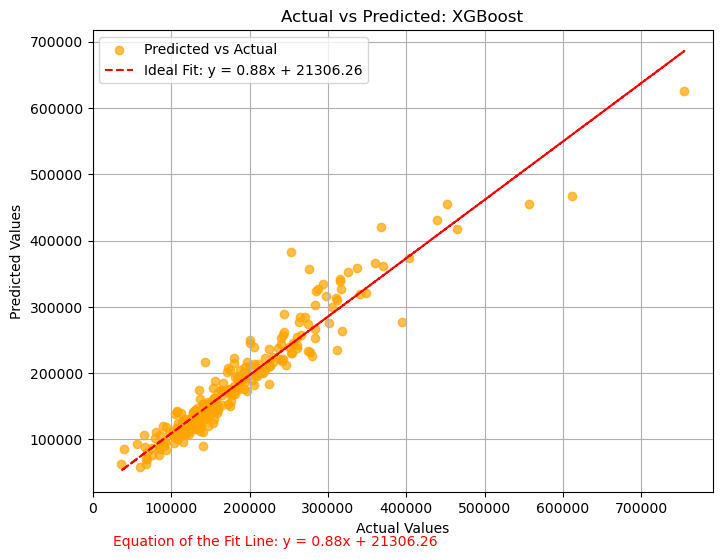

In [5]:
# Initialize XGBoost Regressor
xgb_model = XGBRegressor(random_state=42)

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],  # Test multiple values to evaluate the impact of additional trees
    'max_depth': [3, 5],         # Include shallow and moderately deep trees to balance complexity
    'learning_rate': [0.05, 0.1], # Test lower learning rates for more gradual adjustments
    'subsample': [0.8, 1.0]       # Test full and partial subsampling to evaluate its effects
}

grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    cv=3,  # Cross-validation folds to evaluate generalization performance
    scoring='neg_mean_squared_error',  # Using MSE for RMSE calculation
    n_jobs=-1,  # Utilize all available processing cores for faster execution
    verbose=2  # Higher verbosity to provide detailed updates during execution
)

# Fit the model using raw imputed data
grid_search.fit(X_train_rf_sub, y_train_rf_sub)  # Use raw imputed data for training

# Get the best estimator from GridSearchCV
best_xgb_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)  # Print selected hyperparameters

# Validate the model using raw validation data
y_pred_xgb = best_xgb_model.predict(X_valid_rf)  # Use the corresponding validation set
rmse_xgb = np.sqrt(mean_squared_error(y_valid_rf, y_pred_xgb))  # Calculate RMSE
print("XGBoost Validation RMSE:", rmse_xgb)

# Perform cross-validation to evaluate the model performance
cv_scores_xgb = cross_val_score(
    best_xgb_model, 
    X_train_rf,  # Use raw imputed training data
    y_train, 
    cv=3,  # Reduced folds for faster processing
    scoring='neg_mean_squared_error'  # Using MSE for RMSE calculation
)
print("XGBoost Cross-validation RMSE:", np.sqrt(-cv_scores_xgb.mean()))  # Convert negative MSE to RMSE

# Make predictions on the test set using raw test data
y_test_pred_xgb = best_xgb_model.predict(X_test_rf)  # Use raw imputed test data for predictions

# Create a submission file
submission = pd.DataFrame({'Id': test_df['Id'], 'SalePrice': y_test_pred_xgb})
submission.to_csv('XGB_submission.csv', index=False)

print("XGBoost submission file saved!")

# Calculate the line equation for Actual vs Predicted
actual = np.array(y_valid_rf).reshape(-1, 1)  # Actual values reshaped
predicted = np.array(y_pred_xgb).reshape(-1, 1)  # Predicted values reshaped

# Fit linear regression model to compute the slope and intercept
line_model = LinearRegression()
line_model.fit(actual, predicted)
m = line_model.coef_[0][0]  # Slope
b = line_model.intercept_[0]  # Intercept

# Scatter plot for Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_valid_rf, y_pred_xgb, alpha=0.7, color='orange', label='Predicted vs Actual')
plt.plot(y_valid_rf, m * y_valid_rf + b, color='red', linestyle='--', label=f'Ideal Fit: y = {m:.2f}x + {b:.2f}')
plt.title('Actual vs Predicted: XGBoost')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)

# Display the equation below the graph
plt.figtext(0.15, 0.02, f"Equation of the Fit Line: y = {m:.2f}x + {b:.2f}", fontsize=10, color='red')

plt.show()

### XGBoost Model: Explanation and Evaluation

The XGBoost model utilizes gradient boosting to predict house prices by combining the outputs of multiple decision trees trained sequentially. Each tree corrects the errors made by previous trees, making XGBoost a highly accurate and robust method for structured datasets.

#### Model Overview
XGBoost operates by minimizing a specified loss function (e.g., Mean Squared Error) through gradient descent. Each tree contributes to reducing the residual errors of the previous iteration, improving predictions iteratively. For this project, the following steps were implemented:

- A **GridSearchCV optimization process** was applied to tune hyperparameters like:
  - `n_estimators` (number of trees)
  - `max_depth` (tree depth)
  - `learning_rate`
  - `subsample` (fraction of samples used per tree)
  - The grid included values such as `n_estimators: [100, 200]`, `max_depth: [3, 5]`, `learning_rate: [0.05, 0.1]`, and `subsample: [0.8, 1.0]`.
  - The best-performing hyperparameters from this process were: `{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}`.
- **Raw imputed data** was used without scaling or polynomial transformations, as XGBoost can naturally handle such data structures.
- **Cross-validation** was performed to evaluate model generalization across multiple data splits.
- Predictions were validated on the held-out validation set, and **Root Mean Squared Error (RMSE)** was used as the evaluation metric.

#### Evaluation
The XGBoost model achieved the following results:
- **Validation RMSE**: **25,290.54**
- **Cross-validation RMSE**: **26,613.88**
- **Kaggle RMSE Score**: **0.13484**

These scores highlight the ability of XGBoost to model complex patterns and relationships within the data. Its performance demonstrated a significant improvement over simpler models like Linear Regression and Random Forest, achieving the lowest Kaggle RMSE score among the models tested.

#### Comparison and Graph Analysis
The included scatter plot for the XGBoost model visualizes the relationship between actual and predicted house prices. The orange points represent individual predictions, while the red dashed line illustrates the best-fit trend. The equation of the trendline is:

$$ y = 0.88x + 21306.26 $$

In contrast, the Random Forest model's graph had a trendline equation of:

$$ y = 0.79x + 36381.02 $$

Key observations from the comparison:
- **XGBoost Model**: The scatter plot shows tighter clustering of predictions around the red dashed line, reflecting better accuracy and reduced errors in capturing complex patterns and interactions within the data.
- **Random Forest Model**: While effective in modeling non-linear relationships, the predictions were slightly more dispersed around the red dashed line, indicating a lesser degree of precision compared to XGBoost.
- **Linear Regression Model**: The predictions were even more dispersed, particularly for instances where non-linear interactions dominated, highlighting the model's limitations in representing complex patterns.

The graph of the XGBoost model further illustrates its robustness in handling intricate relationships within the dataset compared to both random forest and linear regression models. The improvement in clustering around the trendline aligns with XGBoost's superior predictive power, as evidenced by the lowest Kaggle RMSE score (**0.13484**) among the models tested.

#### Performance Analysis
- **Strengths:**
  - Captures non-linear relationships and complex interactions within the dataset using gradient boosting.
  - Includes built-in regularization (L1 and L2) to control overfitting and improve generalization.
  - Handles missing values and does not require extensive feature preprocessing, such as scaling or transformation.
  - Highly efficient due to optimized parallel processing and hardware utilization.

- **Limitations:**
  - Computationally expensive compared to simpler models, requiring more time and resources, especially during hyperparameter tuning.
  - Sensitive to hyperparameter settings, requiring careful tuning to achieve optimal performance.
  - Reduced interpretability compared to simpler models; while feature importance is available, understanding individual decision contributions can be challenging.

#### Opportunities for Improvement
To further improve the performance of the XGBoost model:
- **Explore advanced hyperparameter tuning techniques**: Implement RandomizedSearchCV or Bayesian optimization for efficient exploration of more complex hyperparameter spaces.
- **Enhance feature engineering**: Create additional interaction terms or domain-specific features that might reveal hidden patterns in the data.
- **Combine ensemble methods**: Blend XGBoost predictions with those from other models, such as Random Forest or Ridge Regression, to create a stacked ensemble for increased robustness.
- **Optimize computational efficiency**: Reduce training time through early stopping or dimensionality reduction to streamline feature selection.

The XGBoost model demonstrates its capacity to excel in structured datasets, balancing precision and flexibility. Its ability to achieve superior performance across both validation and test datasets establishes it as a robust choice for addressing complex predictive tasks.

### **Impact Section**

This project has implications in social, ethical, and practical domains. Accurate house price predictions can promote transparency and fairness in real estate, enabling informed decisions for buyers and sellers. However, biased data or correlations with sensitive attributes may inadvertently reinforce inequalities, emphasizing the need for ethical safeguards.

The use of computationally intensive models like XGBoost raises environmental concerns due to energy consumption, suggesting the importance of optimizing workflows and leveraging renewable resources. While these AI-driven tools offer valuable insights, balancing automation with human oversight remains critical to ensuring responsible applications in real-world scenarios.

### **Conclusion**

This project provided valuable insights into regression analysis and the impact of various techniques on predictive performance. Experiments with Linear Regression, Random Forest, and XGBoost highlighted the importance of pre-processing and hyperparameter tuning in achieving model success. Standardizing features and applying polynomial transformations significantly improved Linear Regression, while Random Forest and XGBoost performed effectively with raw data, requiring minimal pre-processing. Strategic feature selection enhanced accuracy by emphasizing key variables like `OverallQual` and `YearBuilt`, while excluding less relevant features reduced noise.

Scatter plots comparing actual and predicted prices offered a clear view of model performance. Linear Regression struggled with non-linear relationships, Random Forest showed improvement but exhibited some dispersion, and XGBoost excelled with tightly clustered predictions and the lowest RMSE scores. Hyperparameter tuning for XGBoost, including adjustments to `max_depth` and `learning_rate`, significantly boosted its predictive power.

Overall, this project emphasized the value of careful pre-processing, feature selection, and model evaluation. The lessons learned extend beyond house price prediction, offering transferable insights for predictive modeling across a variety of domains.

### **References**

- **Dataset Title:** House Prices - Advanced Regression Techniques  
- **Source:** [Kaggle Dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)  
- **Description:** A dataset with 79 features describing residential homes in Ames, Iowa, used for predictive modeling.

This dataset was used for all analyses and experiments in this project.